In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import linear_model

In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 12, 31)
index = pd.date_range(start, end)
index, len(index)

(DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
                '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                '2020-01-09', '2020-01-10',
                ...
                '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
                '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
                '2020-12-30', '2020-12-31'],
               dtype='datetime64[ns]', length=366, freq='D'), 366)

In [3]:
multiple = 5
l = list(range(0, len(index)*multiple, multiple))
df = pd.DataFrame(l, index = index)
df.index.name = "date"
df.columns = ["value"]
df

,value
date,
2020-01-01,0
2020-01-02,5
2020-01-03,10
2020-01-04,15
2020-01-05,20
...,...
2020-12-27,1805
2020-12-28,1810
2020-12-29,1815


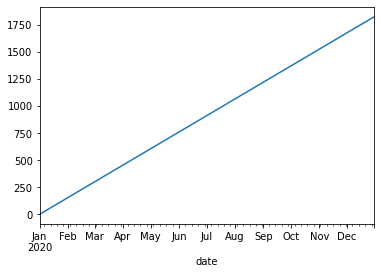

In [4]:
df.value.plot()

In [5]:
df['days_from_start'] = (df.index - df.index[0]).days; df

,value,days_from_start
date,,
2020-01-01,0,0
2020-01-02,5,1
2020-01-03,10,2
2020-01-04,15,3
2020-01-05,20,4
...,...,...
2020-12-27,1805,361
2020-12-28,1810,362
2020-12-29,1815,363


In [6]:
x = df['days_from_start'].values.reshape(-1, 1)
y = df['value'].values

In [7]:
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [8]:
model = linear_model.LinearRegression().fit(x, y)
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.predict([[1], [7], [50]])

array([  5.,  35., 250.])

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([5.])

In [ ]:
model.intercept_

-3.410605131648481e-13

In [6]:
# creating custom tranformer to prepare dataset

import pandas as pd
import sklearn
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn import preprocessing

In [7]:
sales_data = pd.read_csv("sales.csv",   header = 0, sep = ";")

In [25]:
categories = pd.read_csv("categories.csv",   header = 0, sep = ";")
traffic = pd.read_csv("traffic.csv",   header = 0, sep = ";")

In [26]:
sales_data.shape

(105781, 3)

In [27]:
traffic['DateTime'] = traffic['week_starting_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
traffic.drop("week_starting_date", axis = 1, inplace = True)

In [28]:
traffic = traffic.set_index(["product_id", "DateTime"])
categories = categories.set_index(["product_id"])

In [29]:
traffic.loc[[1994], (slice(None))]

traffic
product_id DateTime           
1994       2019-01-07        3
           2019-01-14        1
           2019-01-21        2
           2019-01-28        1
           2019-02-11        1
...                        ...
           2020-11-23        7
           2020-11-30        6
           2020-12-07        7
           2020-12-21        3
           2020-12-28        3

[95 rows x 1 columns]

In [ ]:
# import numpy as np
# from sklearn.base import BaseEstimator, TransformerMixin

# class CustomTransformer(BaseEstimator, TransformerMixin):
#     #the constructor
#     '''setting the add_bedrooms_per_room to True helps us check if the hyperparameter is useful'''
#     def __init__(self, add_bedrooms_per_room = True):
#         self.add_bedrooms_per_room = add_bedrooms_per_room
#     #estimator method
#     def fit(self, X, y = None):
#         return self
#     #transfprmation
#     def transform(self, X, y = None):
#         #getting the three extra attributes by dividing appropriate attributes
#         rooms_per_household = X[:, rooms] / X[:, household]
#         population_per_household = X[:, population] / X[:, household]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms] / X[:, rooms]
#             return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attrib_adder = CustomTransformer()
# our_extra_attributes = attrib_adder.transform(our_dataset.values)  

In [108]:
def prepare_sales_data(sales_df, categories_df, traffic_df):
  sales_df_copy = sales_df.copy()
  sales_df_copy['DateTime'] = sales_df_copy['week_starting_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
  weekly_sales = sales_df_copy.groupby(["product_id", "DateTime"], as_index=True).agg({'sales':'sum'}) # czy to jest potrzebne?

  expanded_full = weekly_sales.groupby(level=0).apply(lambda x: x.reset_index(level=0, drop=True).asfreq("W-Mon").fillna(0))

  full_sales_dataset = expanded_full\
  .merge(categories_df, left_index=True, right_index = True,  how = 'left')\
  .merge(traffic_df, left_index = True,  right_index = True, how = 'left')

  full_sales_dataset["Date"] = full_sales_dataset.index.get_level_values(level = 1)
  
  # adding columns based on start time
  full_sales_dataset['Week_numb'] = full_sales_dataset['Date'].apply(lambda x: int(x.strftime("%V")))
  full_sales_dataset['YW'] = full_sales_dataset['Date'].apply(lambda x: int(x.strftime("%Y%V")))
  full_sales_dataset['Month'] = full_sales_dataset['Date'].apply(lambda x: int(x.month))

  full_sales_dataset["sales_lag_1W"] = full_sales_dataset.shift(1)['sales']
  full_sales_dataset["traffic_lag_1W"] = full_sales_dataset.shift(1)['traffic']

  full_sales_dataset.drop("Date", axis = 1, inplace = True)


  return full_sales_dataset


In [100]:
sales_df_copy = sales_data.copy()
sales_df_copy['DateTime'] = sales_df_copy['week_starting_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
weekly_sales = sales_df_copy.groupby(["DateTime"], as_index=False).agg({'sales':'sum'})

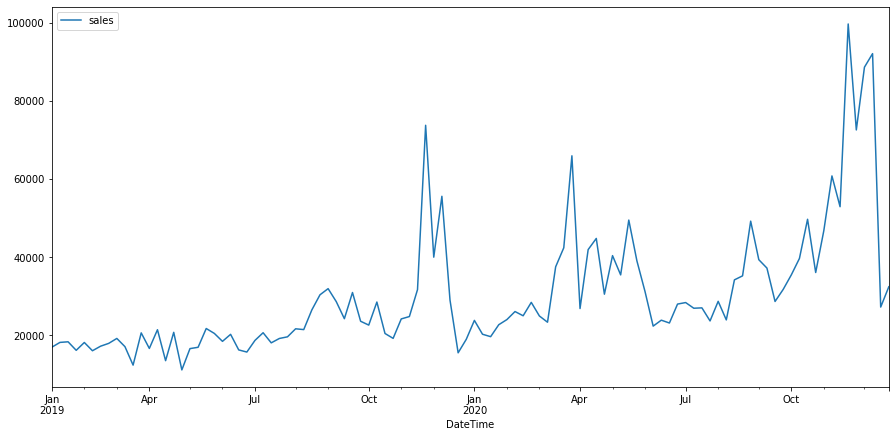

In [133]:
weekly_sales.set_index(["DateTime"]).plot(figsize = (15,7))

In [107]:
sales_data

,week_starting_date,product_id,sales
0,20191209,1990,1
1,20201123,1990,1
2,20201207,1990,1
3,20191202,1990,1
4,20201109,1990,2
...,...,...,...
105776,20201005,567,9
105777,20200928,567,16
105778,20201207,2643,6
105779,20201214,2643,5


In [ ]:
sales_df_copy = sales_data.copy()
sales_df_copy['DateTime'] = sales_df_copy['week_starting_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
weekly_sales_ = sales_df_copy.groupby(["DateTime"], as_index=False).agg({'sales':'sum'})

In [109]:
new_sales_df = prepare_sales_data(sales_data, categories, traffic)

In [113]:
new_sales_df.reset_index().groupby(["DateTime", "category_id"], as_index=False).agg({'sales':'sum'})

,DateTime,category_id,sales
0,2019-01-07,0,62.0
1,2019-01-07,1,88.0
2,2019-01-07,2,77.0
3,2019-01-07,3,52.0
4,2019-01-07,4,544.0
...,...,...,...
8599,2020-12-28,80,8.0
8600,2020-12-28,82,5.0
8601,2020-12-28,83,62.0
8602,2020-12-28,84,35.0


In [117]:
category_aggr = new_sales_df.reset_index().groupby(["DateTime", "category_id"], as_index=False).agg({'sales':'sum'})
pivoted = category_aggr[["category_id", "DateTime", "sales"]].pivot(index = "category_id", columns = "DateTime", values = "sales").fillna(0)

In [128]:
pivoted.shape

(92, 104)

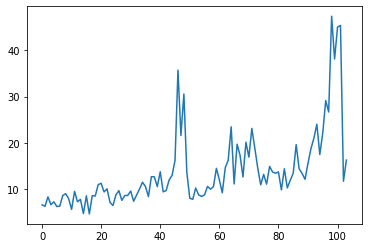

In [130]:
plt.plot(preprocessing.minmax_scale(pivoted.T).T.sum(axis=0))

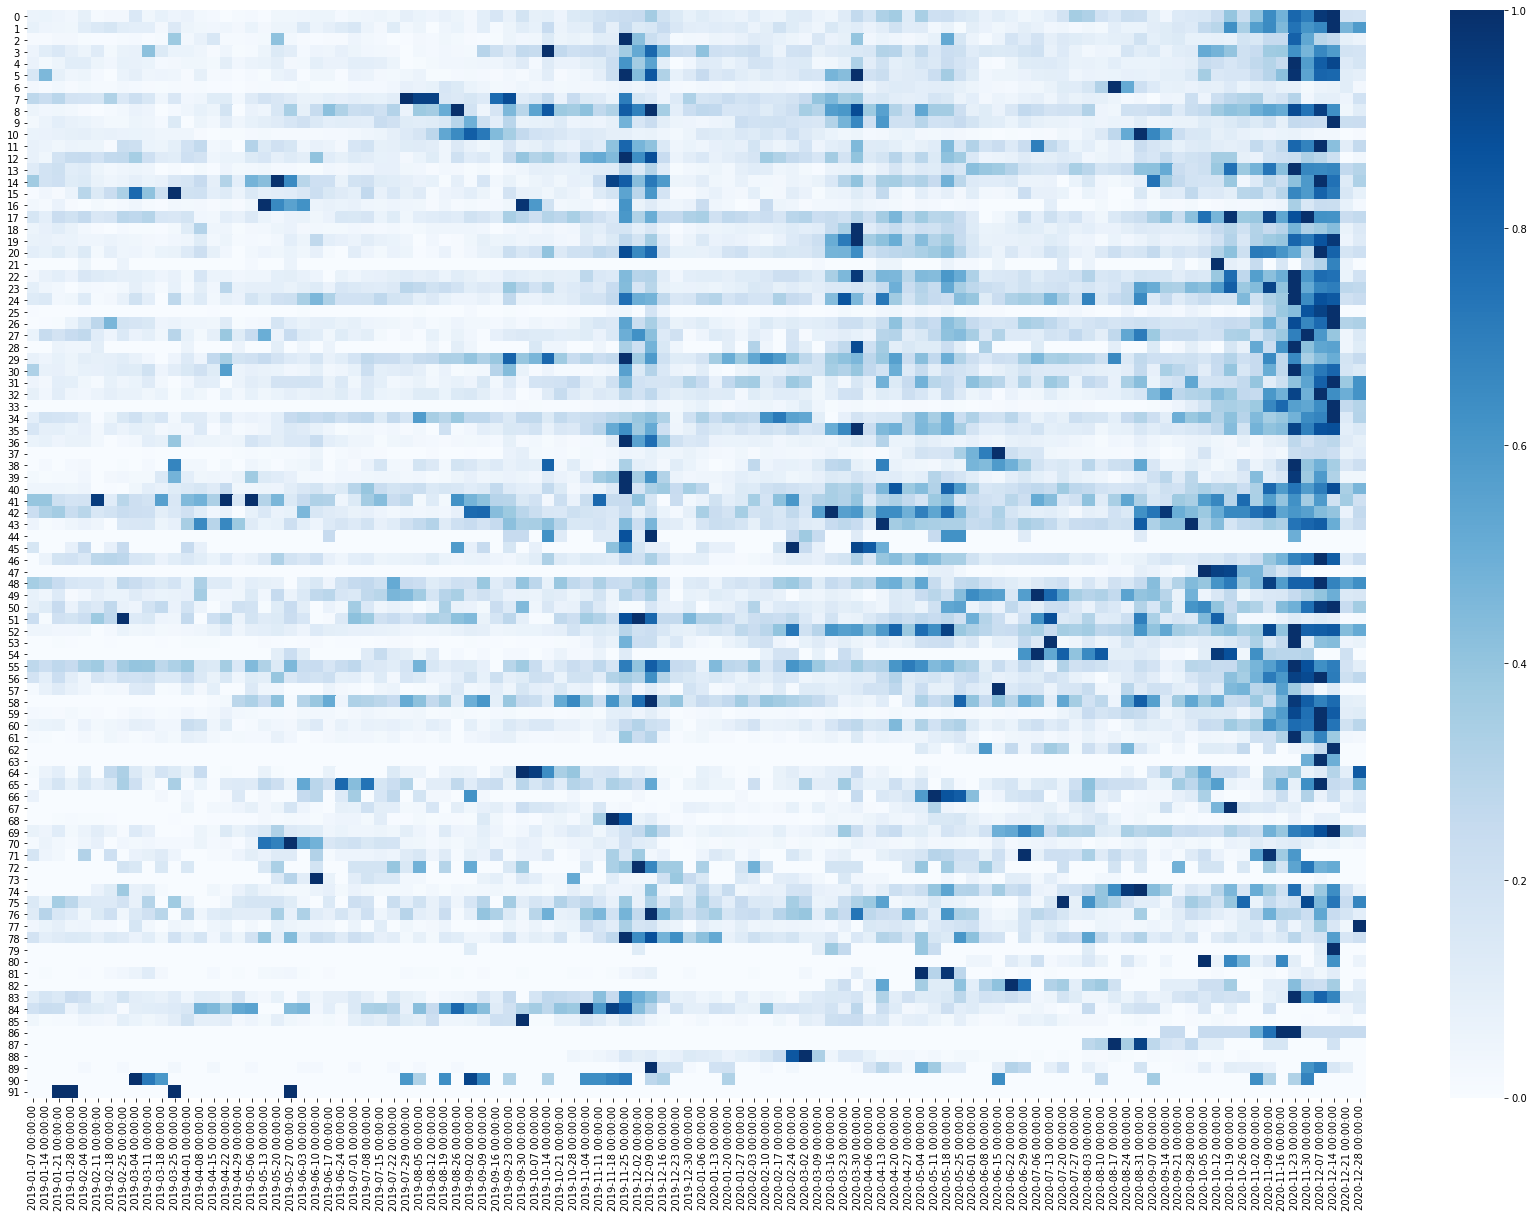

In [118]:
plt.figure(figsize = (30,20))
sns.heatmap(preprocessing.minmax_scale(pivoted.T).T,  xticklabels=pivoted.columns, cmap = 'Blues')

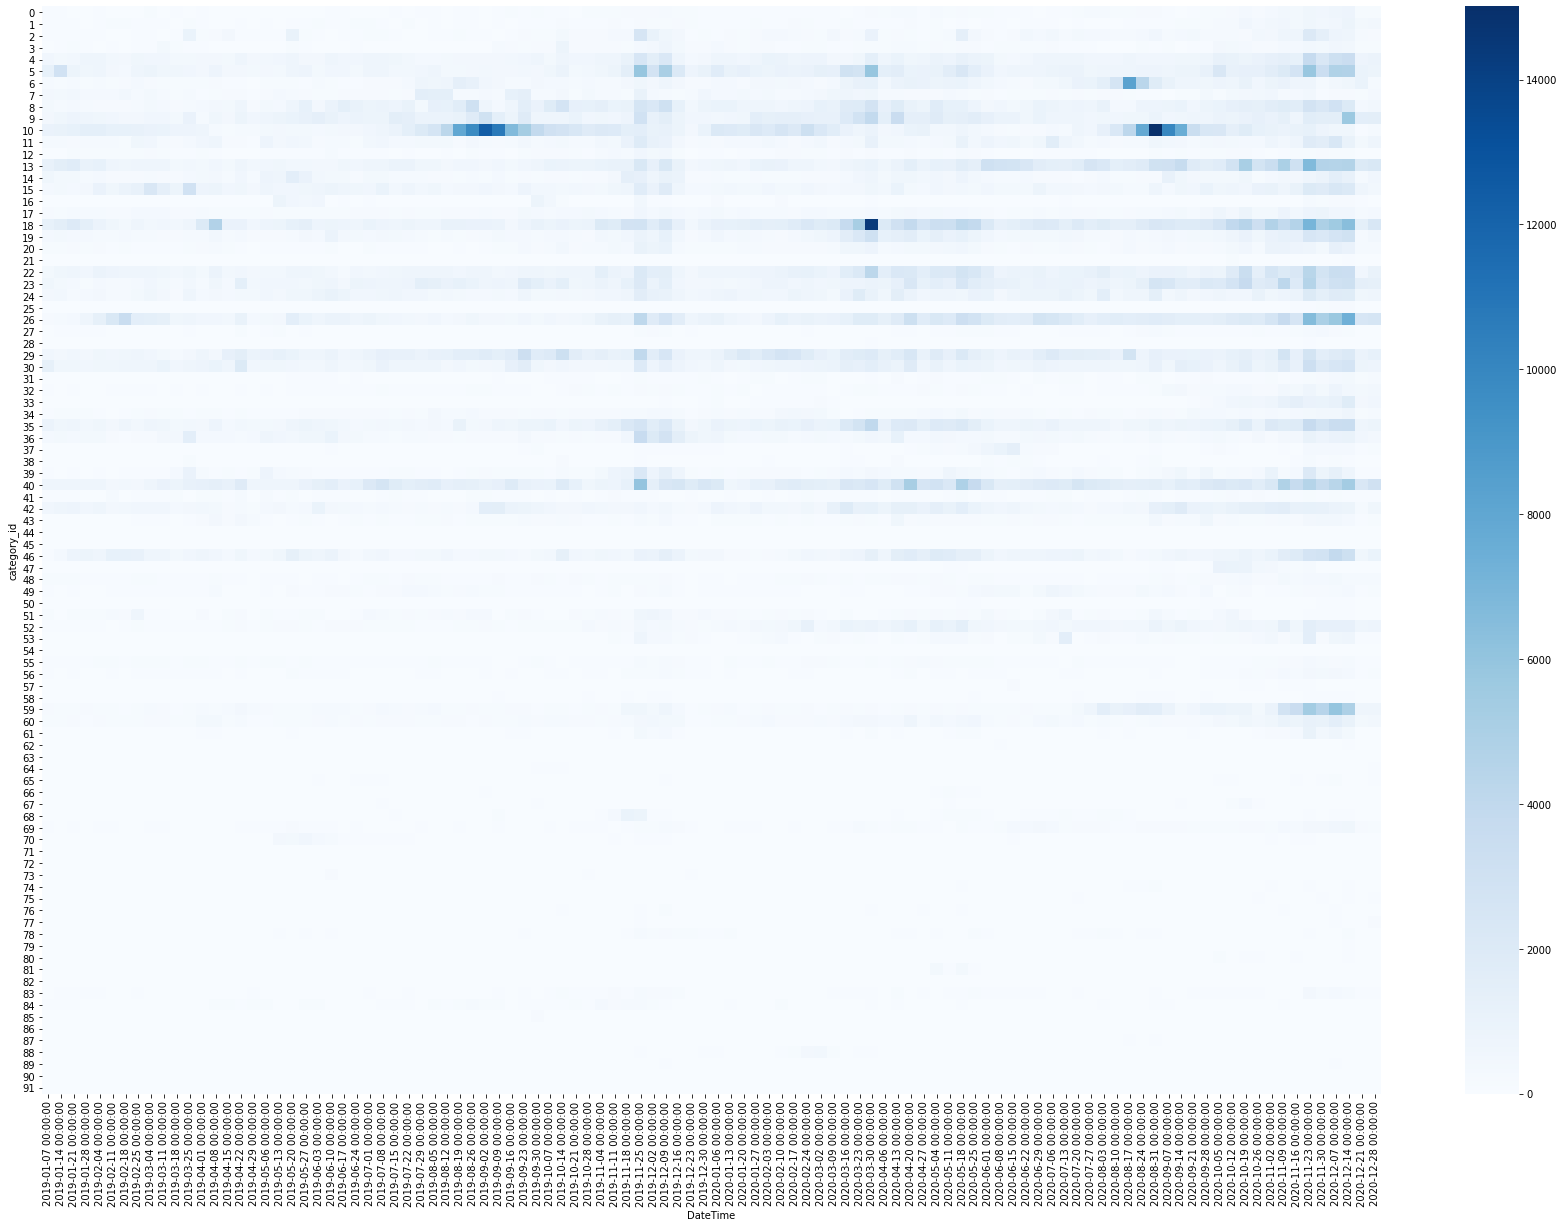

In [119]:
plt.figure(figsize = (30,20))
sns.heatmap(pivoted,  xticklabels=pivoted.columns, cmap = 'Blues')

In [ ]:
# linear regression model on each separately

sales  category_id  ...  sales_lag_1W  traffic_lag_1W
product_id DateTime                        ...                              
1          2020-07-06    1.0           10  ...           NaN             NaN
           2020-07-13    0.0           10  ...           1.0             NaN
           2020-07-20    1.0           10  ...           0.0             NaN
           2020-07-27    3.0           10  ...           1.0             NaN
           2020-08-03    4.0           10  ...           3.0             1.0
...                      ...          ...  ...           ...             ...
3135       2020-11-30  102.0           43  ...         124.0           108.0
           2020-12-07   45.0           43  ...         102.0           142.0
           2020-12-14    8.0           43  ...          45.0            90.0
           2020-12-21   17.0           43  ...           8.0            85.0
           2020-12-28    7.0           43  ...          17.0            38.0

[203730 rows x 8 columns]

In [75]:
# how many obsevations do we have per each product_id
original_count = new_sales_df[["sales"]].groupby(level=0).count().rename(columns={'sales':'weeks_original'})

# how much do we have when we expand the gaps in between
expanded_count = new_sales_df[["sales"]].groupby(level=0).count().rename(columns={'sales':'weeks_expanded'})

result = pd.concat([expanded_count, original_count], axis=1, join="outer").pipe(lambda x: x.assign(nonzero_obs_share = 100*round(x.weeks_original/x.weeks_expanded,4)))


In [76]:
result

,weeks_expanded,weeks_original,nonzero_obs_share
product_id,,,
1,24,24,100.0
2,51,51,100.0
3,70,70,100.0
4,46,46,100.0
5,60,60,100.0
...,...,...,...
3131,48,48,100.0
3132,24,24,100.0
3133,17,17,100.0


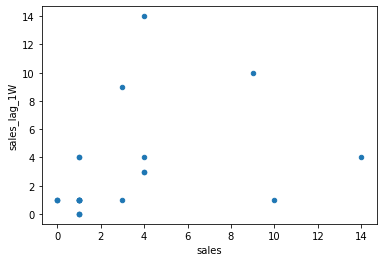

In [78]:
new_sales_df.loc[[1], (slice(None))].plot.scatter(x = "sales", y = "sales_lag_1W")

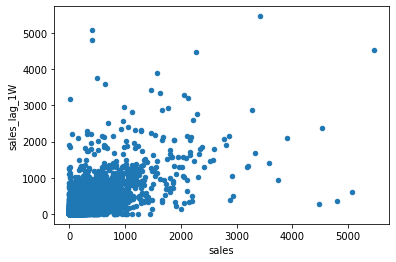

In [81]:
new_sales_df.plot.scatter(x = "sales", y = "sales_lag_1W")

In [83]:
def plot_forecast(original_series, forecast_series, labels =["Sales", "Traffic"]):
  plt.plot(original_series, color='blue',label=labels[0], marker = 'o')
  plt.plot(forecast_series, color='red', label=labels[1], marker = 'o')
  plt.legend(loc='best')
  plt.title('Original value and forecast')

In [90]:
new_sales_df.loc[[1], (slice(None))].sales.values

array([ 1.,  0.,  1.,  3.,  4.,  4., 14.,  4.,  1., 10.,  9.,  3.,  4.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.])

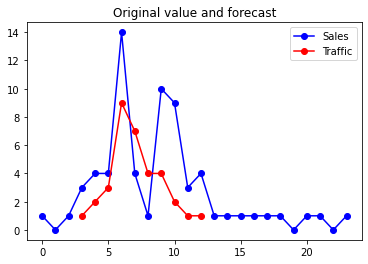

In [91]:
plot_forecast(new_sales_df.loc[[1], (slice(None))].sales.values, new_sales_df.loc[[1], (slice(None))].traffic.values, labels =["Sales", "Traffic"])

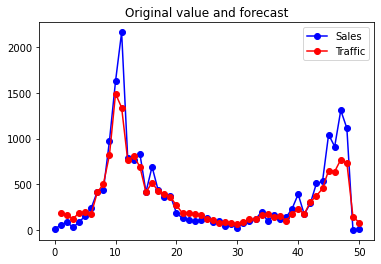

In [92]:
plot_forecast(new_sales_df.loc[[2], (slice(None))].sales.values, new_sales_df.loc[[2], (slice(None))].traffic.values, labels =["Sales", "Traffic"])

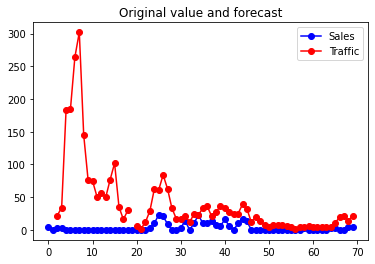

In [93]:
plot_forecast(new_sales_df.loc[[3], (slice(None))].sales.values, new_sales_df.loc[[3], (slice(None))].traffic.values, labels =["Sales", "Traffic"])

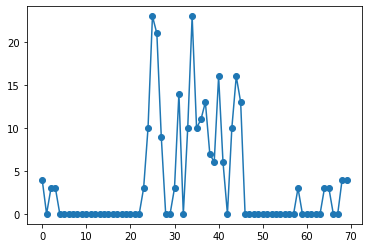

In [94]:
plt.plot(new_sales_df.loc[[3], (slice(None))].sales.values, marker = 'o')